## Simple examples of use of Fast Fourier Transform, FFT

### Remove Unwanted Noise From Audio
First, we will create an audio signal and add a high pitched buzz simulating noise. Then we will remove the buzz using the Fourier transform.

In [1]:
import scipy, matplotlib
print(scipy.__file__)
print(matplotlib.__file__)

/usr/local/lib/python3.12/dist-packages/scipy/__init__.py
/usr/local/lib/python3.12/dist-packages/matplotlib/__init__.py


Here’s some code that generates a sine wave.

After you import NumPy and Matplotlib, you will define two constants:

1.	**SAMPLE_RATE** is the number of data points per second where the signal is calculated. So if the signal had a sample rate of 10 Hz and is five-seconds long, it would contain 10 * 5 = 50 data points.

2.	**DURATION** is the length of the generated wave in seconds.

We define a function `generate_sine_wave`. It takes a frequency, `freq`, and returns the `x` and `y` values we will use to plot the wave. `x` are cooridinates on the time axis and `y` are values of the sine function at those coordinates.

The `x`-coordinates of the sine wave are evenly spaced between 0 and `DURATION`. The code uses NumPy’s `linspace()` to generate them. Function `np.linspace()` takes a start value, the end value, and the number of samples to generate. Setting `endpoint=False` is important. The Fourier transform assumes the signal is periodic.

`np.sin()` calculates the values of the sine function at each of `x`-coordinates. The `x`-coordinate is multiplied by the `2π``frequency` to make the sine wave oscillate at that frequency. The factor `2π` convert the input values to radians.

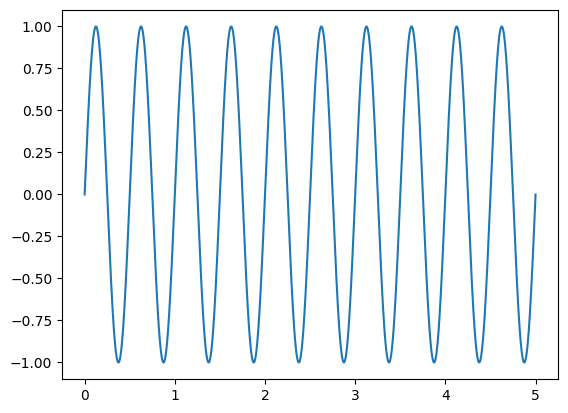

In [2]:
import numpy as np
from matplotlib import pyplot as plt

SAMPLE_RATE = 44100  # Hertz
DURATION = 5  # Seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin expects input in radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Generate a 2 hertz sine wave that lasts for 5 seconds
x, y = generate_sine_wave(2, SAMPLE_RATE, DURATION)
plt.plot(x, y)
plt.show()

The x-axis represents time in seconds. There are two peaks for each second. The sine wave oscillates twice per second. This sine wave is too low in frequency to be audible. In the next section, we will generate some higher-frequency sine waves, and we will see how to mix waves of different frequences.

### Mixing Audio Signals
The good news is that mixing audio signals consists of just two steps:

1.	Adding the signals together

2.	Normalizing the result

Before you can mix the signals together, you need to generate them:


In [3]:
_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)
noise_tone = noise_tone * 0.3

mixed_tone = nice_tone + noise_tone

This code generates a medium-pitch tone and a high-pitch tone assigned to the variables `nice_tone` and `noise_tone`, respectively. We use the high-pitch tone as your unwanted noise. It is multiplied by 0.3 to reduce its power. The code then adds these tones together.

Note that you use the underscore (`_`) to discard the x values returned by `generate_sine_wave()`.

The next step is **normalization**, or scaling the signal to fit into the target format. We chose as the target format a 16-bit integer, which has a range from -32768 to 32767:

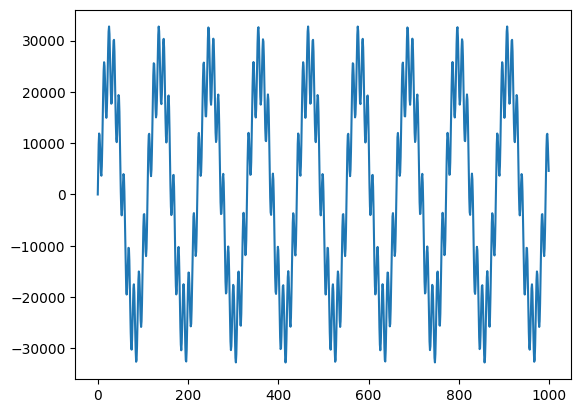

In [4]:
normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)
plt.plot(normalized_tone[:1000])
plt.show()

Here, the code scales `mixed_tone` to make it fit snugly into a 16-bit integer and then cast it to that data type using NumPy’s `np.int16`. Dividing `mixed_ton`e by its maximum value scales it between -1 and 1. When this signal is multiplied by 32767, it is scaled between -32767 and 32767, which is roughly the range of `np.int16`. The code plots only the first 1000 samples so you can see the structure of the signal more clearly.

The signal looks like a distorted sine wave. The sine wave you see is the 400 Hz tone you generated, and the distortion is the 4000 Hz tone. If you look closely, then you can see the distortion has the shape of a sine wave.
To listen to the audio, you need to store it in a format that an audio player can read. The easiest way to do that is to use SciPy’s `wavfile.write` method to store it in a WAV file. 16-bit integers are a standard data type for WAV files. That is why we normalized our signal to 16-bit integers:

In [5]:
from scipy.io.wavfile import write

# Remember SAMPLE_RATE = 44100 Hz is our playback rate
write("mysinewave.wav", SAMPLE_RATE, normalized_tone)

This code will write to a file `mysinewave.wav` in the directory where you run your Python script. You can then listen to this file using any audio player or even with Python. You’ll hear a lower tone and a higher-pitch tone. These are the 400 Hz and 4000 Hz sine waves that you mixed.

In [6]:
import IPython.display as ipd
sample_rate=44100

ipd.Audio("mysinewave.wav", rate=sample_rate)

### Fast Fourier Transform (FFT)
We will use the FFT on the generated audio to visualize , or extract, the frequency content of our signal. The FFT is an algorithm that implements the Fourier transform and calculates frequency spectrum for a signal in the time domain, like our audio signal:

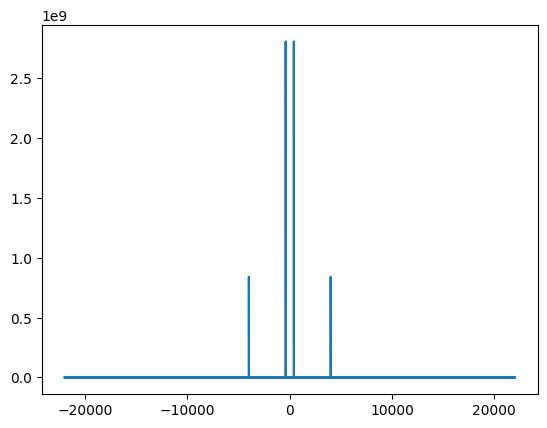

In [8]:
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

This code calculated the Fourier transform of our generated audio and ploted it down.


You can see two peaks in the positive frequencies and mirrors of those peaks in the negative frequencies. The positive-frequency peaks are at 400 Hz and 4000 Hz, which corresponds to the frequencies that we put into the audio.

The Fourier transform has taken our complicated, wibbly signal and turned it into just the frequencies it contains. Since we put in only two frequencies, only two frequencies have come out. The negative-positive symmetry is a side effect of putting real-valued input into the Fourier transform.

In the first couple of lines, we import the functions from `scipy.fft` and define a variable, `N`, that stores the total number of samples in the signal.

The most important lines of the above code calculate the Fourier transform:

`yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)`

The code calls two important functions:
1.	`fft()` calculates the transform itself.
2.	`fftfreq()` calculates the frequencies in the center of each bin in the output of `fft()`. With those values we plot the x-axis on our frequency spectrum.

Once you have the resulting values from the Fourier transform and their corresponding frequencies, you can plot them:
`plt.plot(xf, np.abs(yf))
plt.show()`
The interesting part of this code is the processing you do to `yf` before plotting it. You call `np.abs()` on `yf` because its values are complex.

A complex number is a number that has two parts, a real part and an imaginary part.

Mathematicians generally write complex numbers in the form `a + bi`, where `a` is the real part and `b` is the imaginary part. The `i` after `b` is the imaginary unity.

Complex numbers have two parts, to present them against frequency in a single two-dimensional plot it is convenient to calculate a single value for every complex number. This is where `np.abs()` comes in. It calculates `√(a² + b²)` for complex numbers, which is an overall magnitude of a complex number `a + bi`.

Note: We have noticed that `fft()` returns a maximum frequency of just over 20 thousand Hertz, `22050Hz`, to be exact. This value is exactly half of our sampling rate and is called the **Nyquist frequency**.
The Nyquist frequency is a fundamental concept in signal processing. The sampling rate has to be at least twice the highest frequency in your signal.


### Making It Faster With rfft()
The frequency spectrum that `fft()` outputted was reflected about the y-axis so that the negative half was a mirror of the positive half. This symmetry was caused by using real number inputs (not complex numbers) to the transform.
We use this symmetry to make our Fourier transform faster by computing only half of it. `scipy.fft` implements this speed hack in the form of `rfft()`.
The great thing about `rfft()` is that it is a drop-in replacement for `fft()`. Instead of the FFT code from before, we could write:

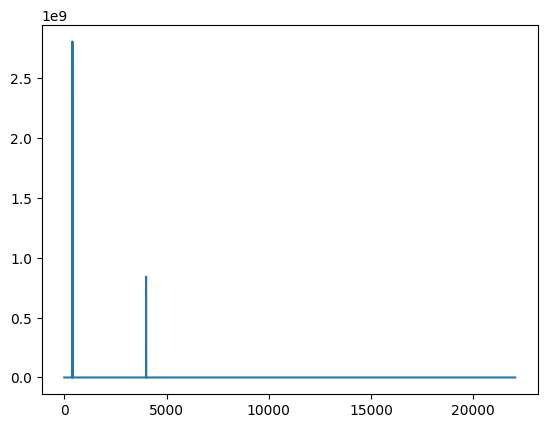

In [9]:
from scipy.fft import rfft, rfftfreq

# Note the extra 'r' at the front
yf = rfft(normalized_tone)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

Since `rfft()` returns only half the output of `ft()`, it uses a different function to get the frequency mapping, `rfftfreq()` instead of `fftfreq()`.

`rfft()` still produces complex output, so the code to plot its result remains the same. The plot, however, should look like the above, since the negative frequencies are removed.

You can see that the image above is just the positive side of the frequency spectrum that `fft()` produces. `rfft()` never calculates the negative half of the frequency spectrum, which makes it faster than using fft().
Using `rfft()` can be up to twice as fast as using `fft()`, but some input lengths are faster than others. If you know you will work only with real numbers, then it’s a speed hack worth knowing.

Now that you have the frequency spectrum of the signal, you can move on to filtering it.


### Filtering the Signal
One great thing about the Fourier transform is that it is reversible, so any changes we make to the signal in the frequency domain will apply when you transform it back to the time domain. We will take advantage of this to filter our audio and get rid of the high-pitched frequency.

The values returned by `rfft()` represent the power of each frequency bin. If you set the power of a given bin to zero, then the frequencies in that bin will no longer be present in the resulting time-domain signal.
Using the length of `xf`, the maximum frequency, and the fact that the frequency bins are evenly spaced, we can work out the target frequency’s index:


In [10]:
# The maximum frequency is half the sample rate
points_per_freq = len(xf) / (SAMPLE_RATE / 2)

# Our target frequency is 4000 Hz
target_idx = int(points_per_freq * 4000)


You can then set `yf` to 0 at indices around the target frequency to get rid of it:

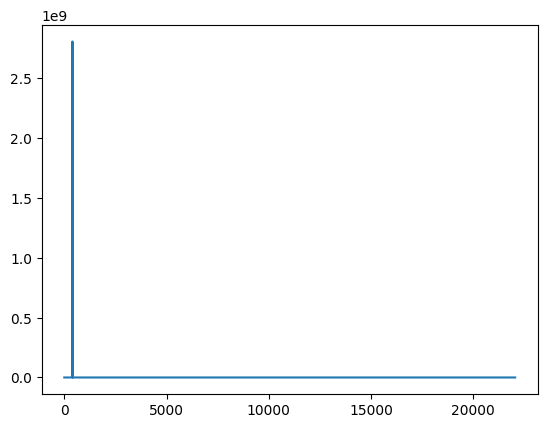

In [11]:
yf[target_idx - 1 : target_idx + 2] = 0

plt.plot(xf, np.abs(yf))
plt.show()


Since there’s only one peak, it looks like it worked! Next, you’ll apply the inverse Fourier transform to get back to the time domain.

### Applying the Inverse FFT
Applying the inverse FFT is similar to applying the FFT:

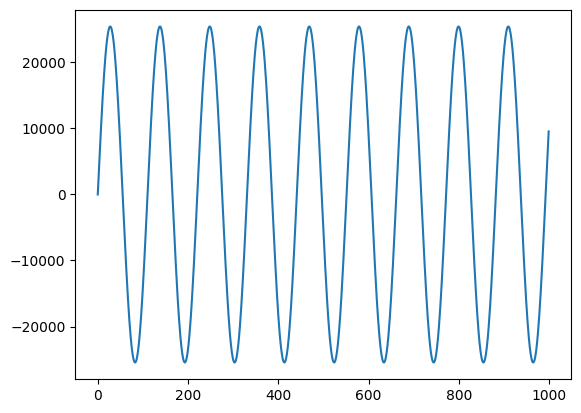

In [12]:
from scipy.fft import irfft

new_sig = irfft(yf)

plt.plot(new_sig[:1000])
plt.show()

Since we are using `rfft()`, we need to use `irfft()` to apply the inverse Fourier transform. However, if we had used `fft()`, then the inverse function would have been `ifft()`. Our plot should now look like the above.

As we can see, we now have a single sine wave oscillating at 400 Hz, and we have successfully removed the 4000 Hz noise.
Once again, we need to normalize the signal before writing it to a file. We can do it the same way as last time:

In [13]:
norm_new_sig = np.int16(new_sig * (32767 / new_sig.max()))

write("clean.wav", SAMPLE_RATE, norm_new_sig)

In [14]:
sample_rate=SAMPLE_RATE

ipd.Audio("clean.wav", rate=sample_rate)

The above example is more for educational purposes than real-world use. Replicating the process on a real-world signal, such as a piece of music, could introduce more buzz than it removes.
In the real world, you should filter signals using the filter design functions in the scipy.signal package. Filtering is a complex topic.

### Fourier Transform of the Single Square Wave Function

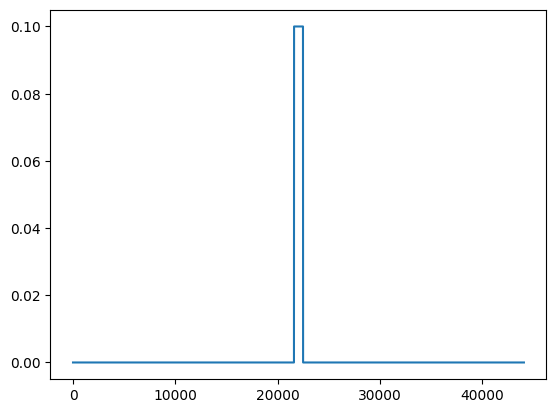

In [15]:
SAMPLE_RATE = 44100  # Hertz
DURATION = 5  # Seconds
LENGTH = 0.02
LOWER = int((0.5-0.5*LENGTH)*SAMPLE_RATE*DURATION)
UPPER = int((0.5+0.5*LENGTH)*SAMPLE_RATE*DURATION)
N = SAMPLE_RATE * DURATION

def generate_square_wave(freq, duration, sample_rate, lower, upper):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    y = np.zeros(sample_rate*duration)
    for i in range(int(sample_rate*duration)):
        if i > lower and i < upper:
            y[i] = 0.1

    return x, y

# Generate a 2 hertz sine wave that lasts for 5 seconds
x, y = generate_square_wave(2,SAMPLE_RATE,DURATION,LOWER,UPPER)
plt.plot(x, y)
plt.show()

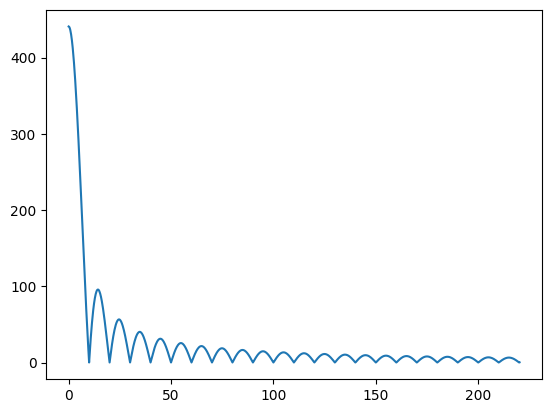

In [16]:
from scipy.fft import fft, fftfreq

# Note the extra 'r' at the front
yf = rfft(y)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

xff = xf[0:int(0.01*xf.size)]
yff = yf[0:int(0.01*xf.size)]
plt.plot(xff, np.abs(yff))
plt.show()

Next we will produce a square wave which is twice as narrow.

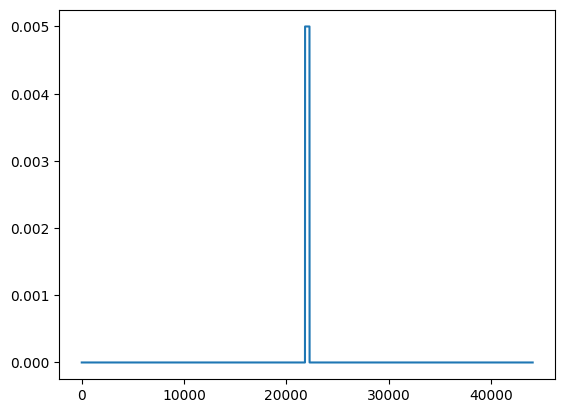

In [17]:
SAMPLE_RATE = 44100  # Hertz
DURATION = 5  # Seconds
LENGTH = 0.01
LOWER = int((0.5-0.5*LENGTH)*SAMPLE_RATE*DURATION)
UPPER = int((0.5+0.5*LENGTH)*SAMPLE_RATE*DURATION)
N = SAMPLE_RATE * DURATION

def generate_square_wave(freq, duration, sample_rate, lower, upper):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    y = np.zeros(sample_rate*duration)
    for i in range(int(sample_rate*duration)):
        if i > lower and i < upper:
            y[i] = 0.005

    return x, y

# Generate a 2 hertz sine wave that lasts for 5 seconds
x, y = generate_square_wave(2,SAMPLE_RATE,DURATION,LOWER,UPPER)
plt.plot(x, y)
plt.show()

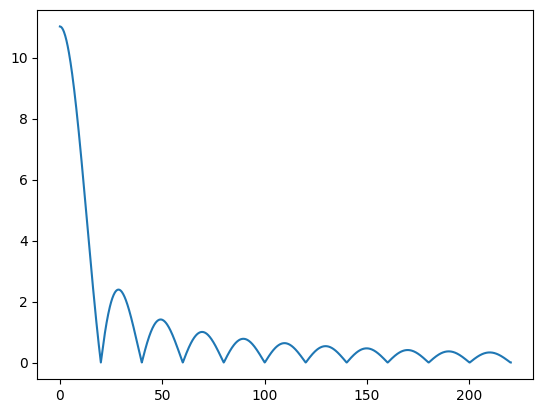

In [18]:
from scipy.fft import fft, fftfreq

# Note the extra 'r' at the front
yf = rfft(y)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

xff = xf[0:int(0.01*xf.size)]
yff = yf[0:int(0.01*xf.size)]
plt.plot(xff, np.abs(yff))
plt.show()

If you compare this Fourier transform with the Fourier transform for twice as broad square wave above, you will notice that this function is stretched twice as long. This is a consequence of a general theorem that states that the Fourier transform of a function stretched by a factor in time is a function compressed in the frequency domain by the same factor.